# UrbanSound results

The inputs are mfcc vectors extracted each sound file.


### Experiment 1

### Experiment 2

### Experiment 3

### Experiment 4

In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json


* classification report

    The recall means "how many of this class you find over the whole number of element of this class", i.e., "what percent of the positive cases did you catch? = true positive/(true pos. + false neg.)

    The precision will be "how many are correctly classified among that class" = true pos./(true pos.+false pos.)

    The f1-score is the harmonic mean between precision & recall=(prec*recall)/(prec + recall)

    The support is the number of occurence of the given class in your dataset 
    
* true pos., true neg. ... what are these?

    true positive: true value is 'yes', and the prediction is 'yes'
    
    true negative: true valuse is 'no', and the prediction is 'no'
    
    false positive: true value is 'no', but the prediction is 'yes'
    
    false negative: true valuse is 'yes', but the prediciton is 'no'

In [14]:
classes = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']

## Check the best model and result of Experiment 2

In [53]:
# Set path, filenames

experiment2_path = "../Results/Experiment 2/"
converted_csv_filename = "exp2best_json_tocsv.csv"

# exp2 output files
json_filenames = ["example2FinalResults-123.json",
                  "example2FinalResults-456.json",
                  "example2FinalResults-789.json",
                  "example2FinalResults-1012.json"
                 ]
test_folders = ["1,2,3", "4,5,6", "7,8,9", "10,1,2"]

# The model instance with the best accuracy

# the index in json file which has the parameter = [nr=256, drop=0.3, epoch=40, bs=16]
model_nb = 38 

model_result = {
    "parameter" : [],
    "report" : [],
    "finalAcc" : [],
    "finalVal" : []
}

for i in range(len(json_filenames)):
    # read the output json file
    jsonfile_path = os.path.join(experiment2_path, json_filenames[i])

    with open(jsonfile_path, "r") as f:
        report = json.load(f)
        # take the best model parameters and results
        model_result["parameter"].append(report[model_nb]["parameters"])
        model_result["report"].append(report[model_nb]["report"])
        model_result["finalAcc"].append(report[model_nb]["finalAcc"])
        model_result["finalVal"].append(report[model_nb]["finalVal"])

In [54]:
json.dumps(model_result["report"][0], indent=4)

'{\n    "air_conditioner": {\n        "precision": 0.27426810477657937,\n        "recall": 0.22305764411027568,\n        "f1-score": 0.24602626123013133,\n        "support": 798\n    },\n    "car_horn": {\n        "precision": 0.35526315789473684,\n        "recall": 0.3576158940397351,\n        "f1-score": 0.3564356435643564,\n        "support": 151\n    },\n    "children_playing": {\n        "precision": 0.4079391891891892,\n        "recall": 0.6113924050632912,\n        "f1-score": 0.4893617021276596,\n        "support": 790\n    },\n    "dog_bark": {\n        "precision": 0.5391432791728212,\n        "recall": 0.6013179571663921,\n        "f1-score": 0.5685358255451713,\n        "support": 607\n    },\n    "drilling": {\n        "precision": 0.5224358974358975,\n        "recall": 0.4553072625698324,\n        "f1-score": 0.4865671641791045,\n        "support": 716\n    },\n    "engine_idling": {\n        "precision": 0.36400541271989173,\n        "recall": 0.3383647798742138,\n      

In [42]:
scores_df = pd.DataFrame()
class_report_df = pd.DataFrame()
for i in range(len(json_filenames)):
    ith_report = model_result["report"][i]
    class_report = {}
    scores = {}
    precisions = []
    recalls = []
    f1_scores = []
    supports = []
    for j in range(len(classes)):
        precisions.append(ith_report[classes[j]]["precision"])
        recalls.append(ith_report[classes[j]]["recall"])
        f1_scores.append(ith_report[classes[j]]["f1-score"])
        supports.append(ith_report[classes[j]]["support"])
    class_report["test folders"] = test_folders[i]
    class_report["class"]=classes        
    class_report["precision"] = precisions
    class_report["recall"] = recalls
    class_report["f1-score"] = f1_scores
    class_report["support"] = supports
    scores["parameter"] = model_result["parameter"][i]
    scores["test folders"] = test_folders[i]
    scores["trainAcc"] = model_result["finalAcc"][i]
    scores["valAcc"] = model_result["finalVal"][i]
    scores["testAcc"] = ith_report["accuracy"]

    class_report_df = class_report_df.append(pd.DataFrame(class_report), ignore_index=True)
    scores_df = scores_df.append(pd.DataFrame(scores,index=[0]), ignore_index=True)

In [45]:
print(scores_df['testAcc'].mean())
scores_df

0.4797716963205796


,parameter,test folders,trainAcc,valAcc,testAcc
0,"[256, 0.3, 40, 16]","1,2,3",0.756829,0.425228,0.432873
1,"[256, 0.3, 40, 16]","4,5,6",0.767694,0.513547,0.455075
2,"[256, 0.3, 40, 16]","7,8,9",0.754888,0.543966,0.533784
3,"[256, 0.3, 40, 16]","10,1,2",0.749365,0.433033,0.497355


In [55]:
class_report_df.to_csv(os.path.join(experiment2_path, "exp2best_json_tocsv.csv"))

In [62]:
avg_report = class_report_df.groupby(['class']).mean()
avg_report

,precision,recall,f1-score,support
class,,,,
air_conditioner,0.408739,0.390443,0.398643,799.00
car_horn,0.333294,0.324076,0.319801,149.75
children_playing,0.410813,0.571190,0.477563,790.00
dog_bark,0.664361,0.640730,0.651066,599.25
drilling,0.532407,0.442821,0.482989,705.00
engine_idling,0.535531,0.418631,0.457446,794.25
gun_shot,0.862494,0.657473,0.724027,96.00
jackhammer,0.406823,0.339536,0.361981,701.00
siren,0.683328,0.592844,0.633966,757.75


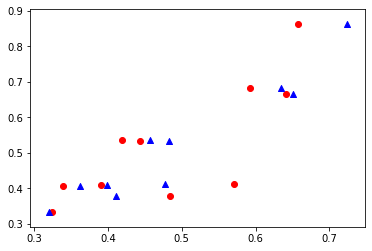

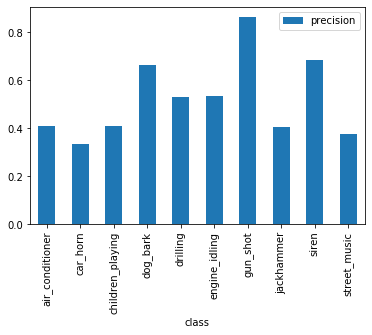

In [64]:

avg_precision = avg_report[["precision"]]
avg_recall =  avg_report[["recall"]]
avg_f1_score =  avg_report[["f1-score"]]

plt.scatter(avg_recall, avg_precision, color='r', marker="o", label="recall")
plt.scatter(avg_f1_score, avg_precision, color='b', marker="^", label="f1-score")
plt.show()

avg_report.plot.bar(y='precision', rot=90)

In [32]:
class_report_df.groupby(['class']).mean()

,precision,recall,f1-score
class,,,
air_conditioner,0.408739,0.390443,0.398643
car_horn,0.333294,0.324076,0.319801
children_playing,0.410813,0.571190,0.477563
dog_bark,0.664361,0.640730,0.651066
drilling,0.532407,0.442821,0.482989
engine_idling,0.535531,0.418631,0.457446
gun_shot,0.862494,0.657473,0.724027
jackhammer,0.406823,0.339536,0.361981
siren,0.683328,0.592844,0.633966


## Check the best model and result of Experiment 3

In [69]:
# Set path, filenames

experiment3_path = "../Results/Experiment 3/"
converted_csv_filename = "exp3best_json_tocsv.csv"

# exp3 output files
json_filenames = ["exp3FinalResults-123_scaled.json",
                  "exp3FinalResults-456_scaled.json",
                  "exp3FinalResults-789_scaled.json",
                  "exp3FinalResults-1012_scaled.json"
                 ]
test_folders = ["1,2,3", "4,5,6", "7,8,9", "10,1,2"]

# The model instance with the best accuracy

# the index in json file which has the parameter = [nr=256, drop=0.3, epoch=40, bs=16]
model_nb = 67

model_result = {
    "parameter" : [],
    "report" : [],
    "finalAcc" : [],
    "finalVal" : []
}

for i in range(len(json_filenames)):
    # read the output json file
    jsonfile_path = os.path.join(experiment3_path, json_filenames[i])

    with open(jsonfile_path, "r") as f:
        report = json.load(f)
        # take the best model parameters and results
        model_result["parameter"].append(report[model_nb]["parameters"])
        model_result["report"].append(report[model_nb]["report"])
        model_result["finalAcc"].append(report[model_nb]["finalAcc"])
        model_result["finalVal"].append(report[model_nb]["finalVal"])

In [71]:
model_result["report"][0]

{'air_conditioner': {'precision': 0.6333333333333333,
  'recall': 0.285,
  'f1-score': 0.393103448275862,
  'support': 200},
 'car_horn': {'precision': 0.8115942028985508,
  'recall': 0.717948717948718,
  'f1-score': 0.7619047619047619,
  'support': 78},
 'children_playing': {'precision': 0.5899280575539568,
  'recall': 0.82,
  'f1-score': 0.6861924686192469,
  'support': 200},
 'dog_bark': {'precision': 0.7647058823529411,
  'recall': 0.78,
  'f1-score': 0.7722772277227723,
  'support': 200},
 'drilling': {'precision': 0.5234042553191489,
  'recall': 0.615,
  'f1-score': 0.5655172413793103,
  'support': 200},
 'engine_idling': {'precision': 0.5205479452054794,
  'recall': 0.5816326530612245,
  'f1-score': 0.5493975903614458,
  'support': 196},
 'gun_shot': {'precision': 0.6276595744680851,
  'recall': 0.8428571428571429,
  'f1-score': 0.7195121951219512,
  'support': 70},
 'jackhammer': {'precision': 0.46236559139784944,
  'recall': 0.35833333333333334,
  'f1-score': 0.403755868544600

In [84]:
scores_df = pd.DataFrame()
class_report_df = pd.DataFrame()
for i in range(len(json_filenames)):
    print(i)
    ith_report = model_result["report"][i]
    class_report = {}
    scores = {}
    precisions = []
    recalls = []
    f1_scores = []
    supports = []
    for j in range(len(classes)):
        precisions.append(ith_report[classes[j]]["precision"])
        recalls.append(ith_report[classes[j]]["recall"])
        f1_scores.append(ith_report[classes[j]]["f1-score"])
        supports.append(ith_report[classes[j]]["support"])
    #print(i, supports)
    class_report["test folders"] = test_folders[i]
    class_report["class"]=classes        
    class_report["precision"] = precisions
    class_report["recall"] = recalls
    class_report["f1-score"] = f1_scores
    class_report["support"] = supports

    #scores["parameter"] = model_result["parameter"][i]
    print("model parameter", model_result["parameter"][i])
    scores["test folders"] = test_folders[i]
    scores["trainAcc"] = model_result["finalAcc"][i]
    scores["valAcc"] = model_result["finalVal"][i]
    scores["testAcc"] = ith_report["accuracy"]
    
    #print(class_report)
    #print(scores)

    class_report_df = class_report_df.append(pd.DataFrame(class_report), ignore_index=True)
    scores_df = scores_df.append(pd.DataFrame(scores,index=[0]), ignore_index=True)


0
model parameter [512, 0.5, 30, 32]
1
model parameter [512, 0.5, 30, 32]
2
model parameter [512, 0.5, 30, 32]
3
model parameter [512, 0.5, 30, 32]


In [85]:
print(scores_df['testAcc'].mean())
scores_df

0.6541101097280606


,test folders,trainAcc,valAcc,testAcc
0,"1,2,3",0.906219,0.605405,0.625213
1,"4,5,6",0.906736,0.597813,0.666147
2,"7,8,9",0.908801,0.697304,0.695255
3,"10,1,2",0.906260,0.635135,0.629825


In [86]:
class_report_df.to_csv(os.path.join(experiment3_path, "exp3best_json_tocsv.csv"))

In [87]:
avg_report = class_report_df.groupby(['class']).mean()
avg_report

,precision,recall,f1-score,support
class,,,,
air_conditioner,0.559940,0.365000,0.437552,200.00
car_horn,0.823679,0.776875,0.792464,90.50
children_playing,0.705744,0.745000,0.716990,200.00
dog_bark,0.743305,0.791250,0.765723,200.00
drilling,0.541471,0.618750,0.576071,200.00
engine_idling,0.590147,0.597265,0.592898,198.25
gun_shot,0.800496,0.875799,0.833881,74.00
jackhammer,0.507478,0.478660,0.488311,212.50
siren,0.780179,0.757112,0.767641,185.00


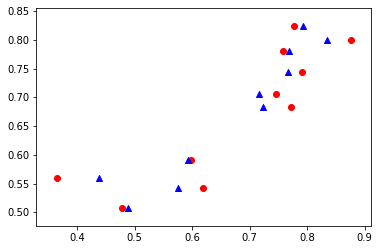

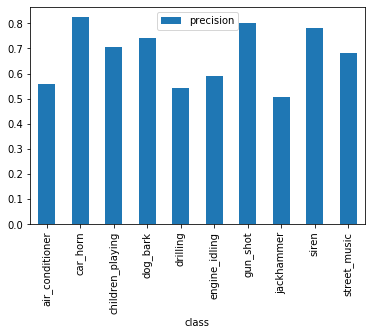

In [88]:
avg_precision = avg_report[["precision"]]
avg_recall =  avg_report[["recall"]]
avg_f1_score =  avg_report[["f1-score"]]

plt.scatter(avg_recall, avg_precision, color='r', marker="o", label="recall")
plt.scatter(avg_f1_score, avg_precision, color='b', marker="^", label="f1-score")
plt.show()

avg_report.plot.bar(y='precision', rot=90)

In [ ]:
report = pd.DataFrame(model_result["report"]).transpose()
accuracy = report.loc["accuracy"]
class_report = report.drop(["accuracy", "macro avg", "weighted avg"], axis=0)

### Convert Experiment 4 results to csv

In [12]:
# Set path, filenames

experment4_path = "../Results/Experiment 4/"

# exp4 output files
filename_scaled = "exp4_report_scaled.json"
filename_nonscaled = "exp4_report.json"

# convert json to csv, file name
csvfilename_scaled =  "exp4_report_scaled_json_tocsv.csv"
csvfilename_nonscaled =  "exp4_report_json_tocsv.csv"
tosave_csvfile = os.path.join(experment4_path, csvfilename_nonscaled)

# read the output json file
jsonfile_path = os.path.join(experment4_path, filename_nonscaled)
with open(jsonfile_path, "r") as f:
    report = json.load(f)

In [13]:
df = pd.DataFrame(report[0]).transpose()
df.head()

,precision,recall,f1-score,support
air_conditioner,0.011364,0.01,0.010638,100.0
car_horn,0.000000,0.00,0.000000,36.0
children_playing,0.482759,0.28,0.354430,100.0
dog_bark,0.782051,0.61,0.685393,100.0
drilling,0.423729,0.25,0.314465,100.0


In [14]:
classes = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music']

result_df = pd.DataFrame(data={}, columns=['class_score', 'precision', 'recall', 'f1-score', 'support', 'test_folder'])
for i in range(10):
    df = pd.DataFrame(report[i])
    t_df = df.transpose().reset_index().rename(columns={"index":"class_score"})
    t_df["test_folder"] = i+1

    result_df = result_df.append(t_df, ignore_index=True)
    

result_df.to_csv(tosave_csvfile)

In [11]:
result_df

,class_score,precision,recall,f1-score,support,test_folder
0,air_conditioner,0.488372,0.420000,0.451613,100.000000,1
1,car_horn,0.795455,0.972222,0.875000,36.000000,1
2,children_playing,0.677966,0.800000,0.733945,100.000000,1
3,dog_bark,0.619835,0.750000,0.678733,100.000000,1
4,drilling,0.445312,0.570000,0.500000,100.000000,1
...,...,...,...,...,...,...
125,siren,0.610390,0.566265,0.587500,83.000000,10
126,street_music,0.801887,0.850000,0.825243,100.000000,10
127,accuracy,0.713262,0.713262,0.713262,0.713262,10
128,macro avg,0.738240,0.727355,0.731153,837.000000,10
